#Initialization

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

sns.set(rc={'figure.figsize':(16,8)})
plt.style.use("fivethirtyeight")
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#Read Dataset

In [3]:

df = pd.read_csv('marketing_campaign_data.csv')
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [5]:
df.isna().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

#Features

In [6]:
df.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

##Features Engineering

In [7]:
import numpy as np
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

df['age'] = 2022 - df['Year_Birth']
df['join_at_age'] = df['Dt_Customer'].dt.year - df['Year_Birth']
df['total_kids'] = df['Kidhome'] + df['Teenhome']
df['is_parents'] = np.where(df['total_kids'] > 0, 1, 0)

# age_range
df.loc[(df['age'] >= 0) & (df['age'] < 12), 'age_range'] = "child"
df.loc[(df['age'] >= 12) & (df['age'] < 18), 'age_range'] = "teens"
df.loc[(df['age'] >= 18) & (df['age'] < 36), 'age_range'] = "young_adults"
df.loc[(df['age'] >= 36) & (df['age'] < 55), 'age_range'] = "middle_aged_adults"
df.loc[(df['age'] >= 55), 'age_range'] = "older_adults"

# amount spent
df['total_amount_spent'] = df['MntCoke'] \
                              + df['MntFruits'] \
                              + df['MntMeatProducts'] \
                              + df['MntFishProducts'] \
                              + df['MntSweetProducts'] \
                              + df['MntGoldProds']

# accepted campaigns
df['total_accepted_campaign'] = df['AcceptedCmp1'] \
                                    + df['AcceptedCmp2'] \
                                    + df['AcceptedCmp3'] \
                                    + df['AcceptedCmp4'] \
                                    + df['AcceptedCmp5']

# total transaction purchased --- WE ASSUMED ALL OF THIS PURCHASES ARE MECE (mutually exclusive and collectively exhaustive)
df['total_transaction'] = df['NumDealsPurchases'] \
                            + df['NumWebPurchases'] \
                            + df['NumCatalogPurchases'] \
                            + df['NumStorePurchases']

def safe_div(x,y):
    if y == 0:
        return 0
    return x / y

df['cvr'] = df.apply(lambda x: safe_div(x['total_transaction'],x['NumWebVisitsMonth']), axis=1)

#EDA: Conversion rate analysis based on income, spending and age

##Statistical Summary

In [8]:
df.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,Z_Revenue,Response,age,join_at_age,total_kids,is_parents,total_amount_spent,total_accepted_campaign,total_transaction,cvr
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,...,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,...,11.0,0.149107,53.194196,44.222321,0.950446,0.715179,6.057982e+05,0.297768,14.862054,4.395222
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,...,0.0,0.356274,11.984069,12.022855,0.751803,0.451430,6.022493e+05,0.678381,7.677173,4.913624
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,11.0,0.000000,26.000000,16.000000,0.000000,0.000000,5.000000e+03,0.000000,0.000000,0.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,...,11.0,0.000000,45.000000,36.000000,0.000000,0.000000,6.875000e+04,0.000000,8.000000,1.222222
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,...,11.0,0.000000,52.000000,43.000000,1.000000,1.000000,3.960000e+05,0.000000,15.000000,2.600000
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,...,11.0,0.000000,63.000000,54.000000,1.000000,1.000000,1.045500e+06,0.000000,21.000000,5.350000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,...,11.0,1.000000,129.000000,121.000000,3.000000,1.000000,2.525000e+06,4.000000,44.000000,43.000000


In [9]:
numeric = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 
                      'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                      'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                      'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                      'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue',
                      'age', 'join_at_age', 'total_kids', 'total_amount_spent'
                     ]

categoric = ['Education', 'Marital_Status',
                        'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                        'AcceptedCmp4', 'AcceptedCmp5', 'Complain',
                        'Response', 'is_parents', 'age_range'
                       ]

In [10]:
#fitur numerik
df[numeric].describe()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,age,join_at_age,total_kids,total_amount_spent
count,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2.240000e+03
mean,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,...,4.084821,2.662054,5.790179,5.316518,3.0,11.0,53.194196,44.222321,0.950446,6.057982e+05
std,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,...,2.778714,2.923101,3.250958,2.426645,0.0,0.0,11.984069,12.022855,0.751803,6.022493e+05
min,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,26.000000,16.000000,0.000000,5.000000e+03
25%,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,...,2.000000,0.000000,3.000000,3.000000,3.0,11.0,45.000000,36.000000,0.000000,6.875000e+04
50%,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,...,4.000000,2.000000,5.000000,6.000000,3.0,11.0,52.000000,43.000000,1.000000,3.960000e+05
75%,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,...,6.000000,4.000000,8.000000,7.000000,3.0,11.0,63.000000,54.000000,1.000000,1.045500e+06
max,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,...,27.000000,28.000000,13.000000,20.000000,3.0,11.0,129.000000,121.000000,3.000000,2.525000e+06


In [11]:
#fitur kategorik
df[categoric].describe()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,is_parents
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.064286,0.013393,0.072768,0.074554,0.072768,0.009375,0.149107,0.715179
std,0.245316,0.114976,0.259813,0.262728,0.259813,0.096391,0.356274,0.451430
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Bivariate Analysis

###Correlation Heatmap

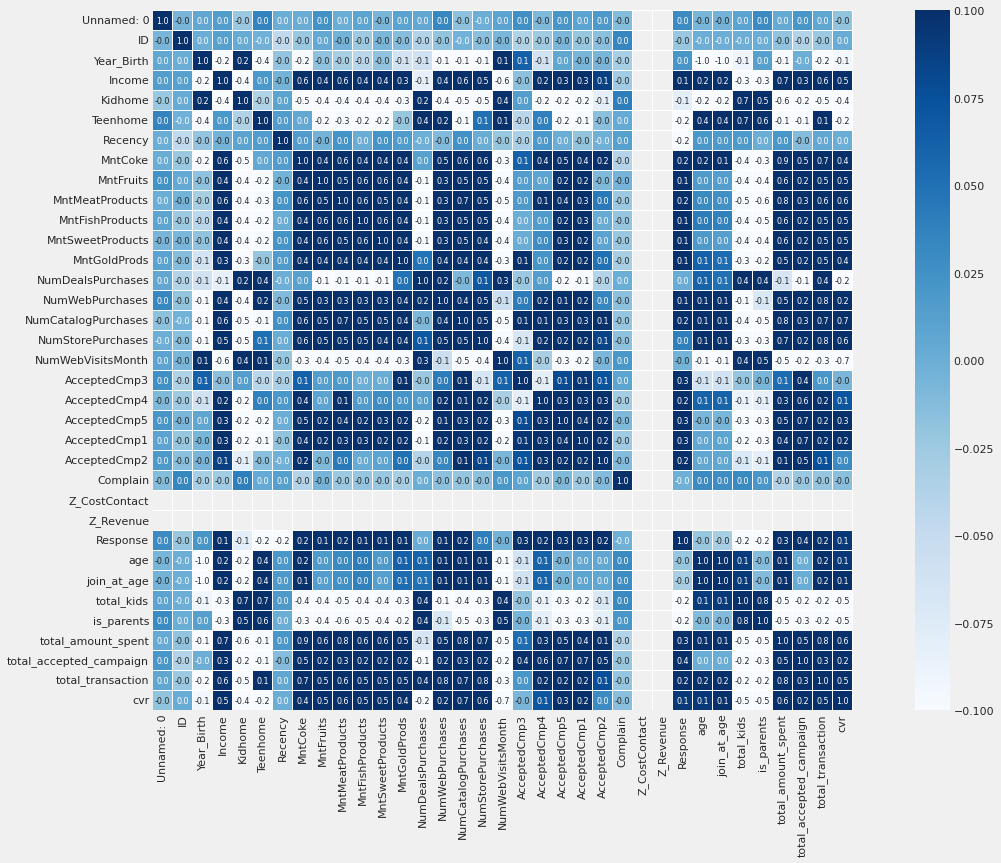

In [12]:
# correlation heatmap
plt.figure(figsize=(20, 12))
corrmat = df.corr()
sns.heatmap(corrmat, cmap='Blues', annot=True, fmt='.1f',
           vmin=corrmat.values.min(), vmax=1, square=True, linewidths=0.1, annot_kws={"fontsize":8})

##Income vs. Spending

(0.0, 120000000.0)

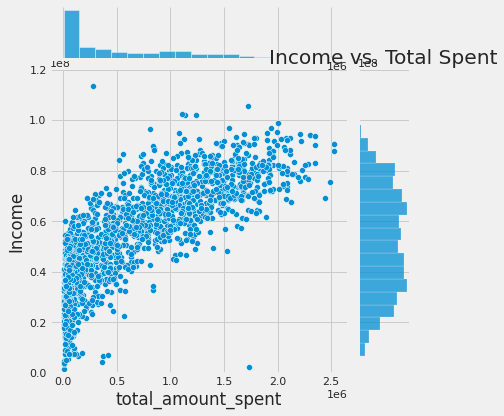

In [13]:
plot = sns.jointplot(x=df["total_amount_spent"], y=df["Income"])
plt.title('Income vs. Total Spent')
plot.ax_marg_y.set_ylim(0, 120000000)

##income vs conversion rate

(0.0, 120000000.0)

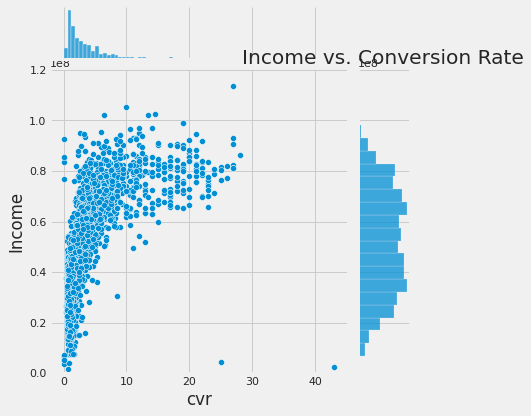

In [14]:
plot = sns.jointplot(x=df["cvr"], y=df["Income"])
plt.title('Income vs. Conversion Rate')
plot.ax_marg_y.set_ylim(0, 120000000)

##Age vs. Spending & Income


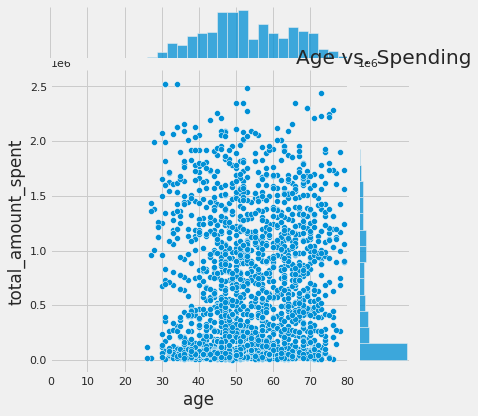

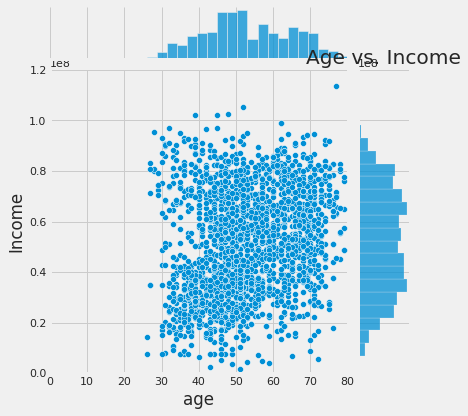

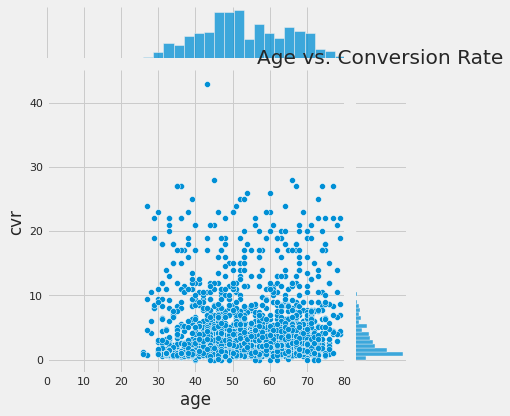

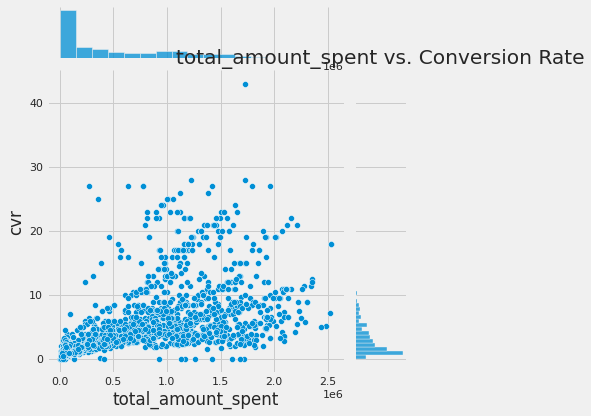

In [15]:
plot = sns.jointplot(x=df["age"], y=df["total_amount_spent"])
plt.title('Age vs. Spending')
plot.ax_marg_x.set_xlim(0, 80)
plt.show()

plot = sns.jointplot(x=df["age"], y=df["Income"])
plt.title('Age vs. Income')
plot.ax_marg_x.set_xlim(0, 80)
plot.ax_marg_y.set_ylim(0, 120000000)
plt.show()

plot = sns.jointplot(x=df["age"], y=df["cvr"])
plt.title('Age vs. Conversion Rate')
plot.ax_marg_x.set_xlim(0, 80)
plt.show()

plot = sns.jointplot(x=df["total_amount_spent"], y=df["cvr"])
plt.title('total_amount_spent vs. Conversion Rate')
# plot.ax_marg_x.set_xlim(0, 80)
plt.show()

#Data Cleaning and Preprocessing

In [16]:
df.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'age', 'join_at_age', 'total_kids', 'is_parents', 'age_range',
       'total_amount_spent', 'total_accepted_campaign', 'total_transaction',
       'cvr'],
      dtype='object')

##Check Missing Value

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               2240 non-null   int64         
 1   ID                       2240 non-null   int64         
 2   Year_Birth               2240 non-null   int64         
 3   Education                2240 non-null   object        
 4   Marital_Status           2240 non-null   object        
 5   Income                   2216 non-null   float64       
 6   Kidhome                  2240 non-null   int64         
 7   Teenhome                 2240 non-null   int64         
 8   Dt_Customer              2240 non-null   datetime64[ns]
 9   Recency                  2240 non-null   int64         
 10  MntCoke                  2240 non-null   int64         
 11  MntFruits                2240 non-null   int64         
 12  MntMeatProducts          2240 non-

In [18]:
df.isna().sum()

Unnamed: 0                  0
ID                          0
Year_Birth                  0
Education                   0
Marital_Status              0
Income                     24
Kidhome                     0
Teenhome                    0
Dt_Customer                 0
Recency                     0
MntCoke                     0
MntFruits                   0
MntMeatProducts             0
MntFishProducts             0
MntSweetProducts            0
MntGoldProds                0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
AcceptedCmp3                0
AcceptedCmp4                0
AcceptedCmp5                0
AcceptedCmp1                0
AcceptedCmp2                0
Complain                    0
Z_CostContact               0
Z_Revenue                   0
Response                    0
age                         0
join_at_age                 0
total_kids                  0
is_parents

Setelah dilakukannya check missing value, fitur Income memiliki missing value, oleh karena itu dilakukan df.isna().sum() untuk menghitung jumlah missing value. Jumlah missing value hanya terdapat sebanyak 24 baris. Maka akan di drop saja

In [19]:
df = df.dropna()

##Check Duplicated Data

In [20]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2216, dtype: bool

In [21]:
df.duplicated().sum()

0

Tidak ditemukannya data yang duplikat

##Feature Encoding

In [22]:
for col in categoric:
    print(f'value counts of column {col}')
    print(df[col].value_counts())
    print('---'*10, '\n')

value counts of column Education
S1     1116
S3      481
S2      365
D3      200
SMA      54
Name: Education, dtype: int64
------------------------------ 

value counts of column Marital_Status
Menikah        857
Bertunangan    573
Lajang         475
Cerai          232
Janda           76
Duda             3
Name: Marital_Status, dtype: int64
------------------------------ 

value counts of column AcceptedCmp1
0    2074
1     142
Name: AcceptedCmp1, dtype: int64
------------------------------ 

value counts of column AcceptedCmp2
0    2186
1      30
Name: AcceptedCmp2, dtype: int64
------------------------------ 

value counts of column AcceptedCmp3
0    2053
1     163
Name: AcceptedCmp3, dtype: int64
------------------------------ 

value counts of column AcceptedCmp4
0    2052
1     164
Name: AcceptedCmp4, dtype: int64
------------------------------ 

value counts of column AcceptedCmp5
0    2054
1     162
Name: AcceptedCmp5, dtype: int64
------------------------------ 

value counts o

In [23]:
# label encoder
mapping_education ={
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}

df['Education_mapped'] = df['Education'].map(mapping_education)

In [24]:
dataset_cats = df[['Education']].copy()
# One hot encoder
for cat in ['Marital_Status', 'age_range', 'is_parents']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    dataset_cats = dataset_cats.join(onehots)

##Feature Standardization

In [25]:
from sklearn.preprocessing import StandardScaler
df_scaled = df.copy()
ss = StandardScaler()

for col in numeric:
    df_scaled[col] = ss.fit_transform(df[[col]])
    
display(df_scaled.shape, df_scaled.head(3))

(2216, 40)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,age,join_at_age,total_kids,is_parents,age_range,total_amount_spent,total_accepted_campaign,total_transaction,cvr,Education_mapped
0,0,5524,1957,S1,Lajang,0.234063,-0.823039,-0.928972,2012-04-09,0.310532,...,0.986443,0.897752,-1.264803,0,older_adults,1.675488,0,25,3.571429,2
1,1,2174,1954,S1,Lajang,-0.234559,1.039938,0.909066,2014-08-03,-0.380509,...,1.236801,1.313688,1.405806,1,older_adults,-0.962358,0,6,1.200000,2
2,2,4141,1965,S1,Bertunangan,0.769478,-0.823039,-0.928972,2013-08-21,-0.795134,...,0.318822,0.315443,-1.264803,0,older_adults,0.280250,0,21,5.250000,2


In [26]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,age,join_at_age,total_kids,is_parents,age_range,total_amount_spent,total_accepted_campaign,total_transaction,cvr,Education_mapped
0,0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,...,65,55,0,0,older_adults,1617000,0,25,3.571429,2
1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,...,68,60,2,1,older_adults,27000,0,6,1.200000,2
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,...,57,48,0,0,older_adults,776000,0,21,5.250000,2
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,...,38,30,1,1,middle_aged_adults,53000,0,8,1.333333,2
4,4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,...,41,33,1,1,middle_aged_adults,422000,0,19,3.800000,4


#DATA MODELING

##K-means clustering

[230006856.54975104, 102587488.20410456, 58110930.723515265, 37192060.07003158, 25992087.101943538, 19158280.46454306, 14687211.070601799, 11714999.64628788, 9504338.364882924, 7904463.556936733, 6672874.577407379, 5682087.188777547, 4942404.29061086, 4335474.740948466, 3835529.175076612, 3442466.37481975, 3090262.132419546, 2803795.358263197]


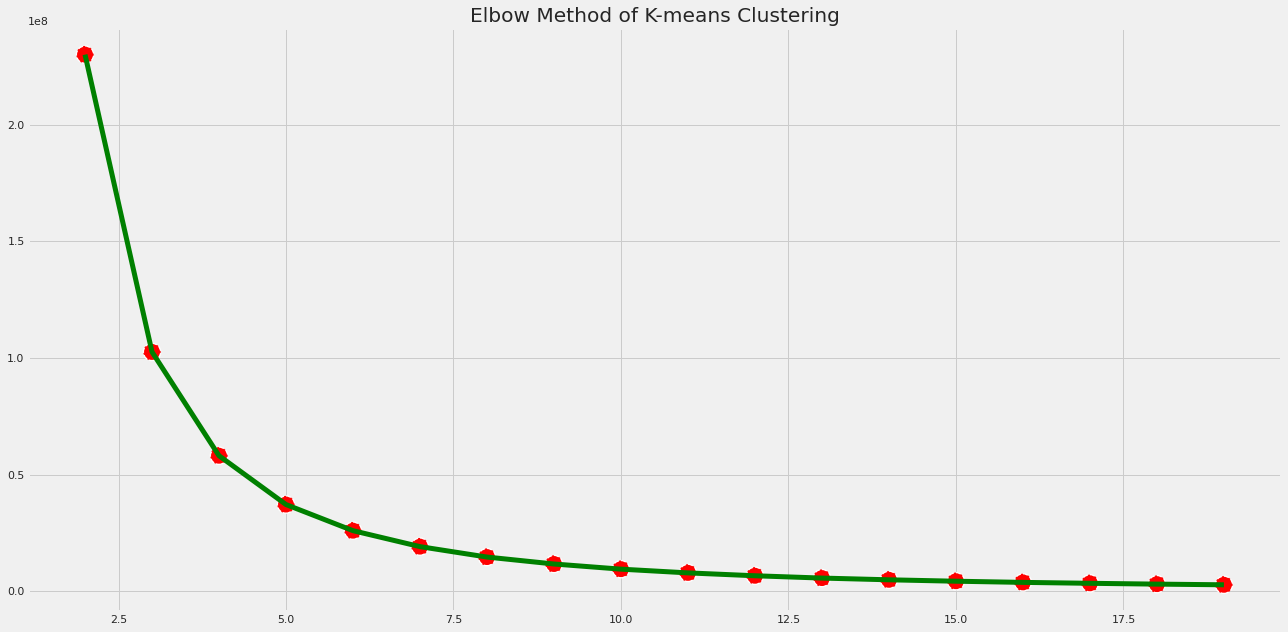

In [27]:
from sklearn.cluster import KMeans
X = df_scaled.drop(columns=['ID', 'Year_Birth', 'Education', 'Marital_Status', 'age_range', 'Dt_Customer']).copy()
# X = df_scaled[numerical_features].copy()
inertia = []

for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X.values)
    inertia.append(kmeans.inertia_)

print(inertia)
plt.figure(figsize=(20, 10))
plt.title('Elbow Method of K-means Clustering')
# plt.plot(inertia)

sns.lineplot(x=range(2, 20), y=inertia, color='Green', linewidth = 5)
sns.scatterplot(x=range(2, 20), y=inertia, s=300, color='Red',  linestyle='--')
plt.savefig('Elbow method with K-Means Clustering.png')

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X.values)
X['cluster'] = kmeans.labels_
df['cluster'] = kmeans.labels_

In [29]:
X.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,age,join_at_age,total_kids,is_parents,total_amount_spent,total_accepted_campaign,total_transaction,cvr,Education_mapped,cluster
0,0,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,0.986443,0.897752,-1.264803,0,1.675488,0,25,3.571429,2,2
1,1,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,1.236801,1.313688,1.405806,1,-0.962358,0,6,1.200000,2,2
2,2,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,0.318822,0.315443,-1.264803,0,0.280250,0,21,5.250000,2,2
3,3,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,-1.266777,-1.181925,0.070501,1,-0.919224,0,8,1.333333,2,2
4,4,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,-1.016420,-0.932363,0.070501,1,-0.307044,0,19,3.800000,4,2


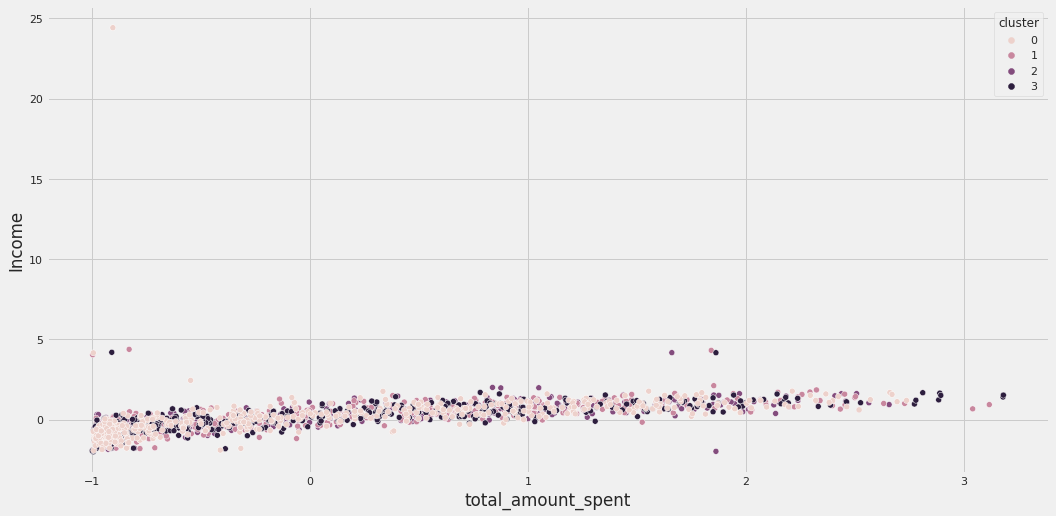

In [30]:
sns.scatterplot(data=X, x='total_amount_spent', y='Income', hue='cluster')


##Silhouette Score

In [31]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.title('Eval:Silhouette Score of K-means Clustering')
    plt.show()

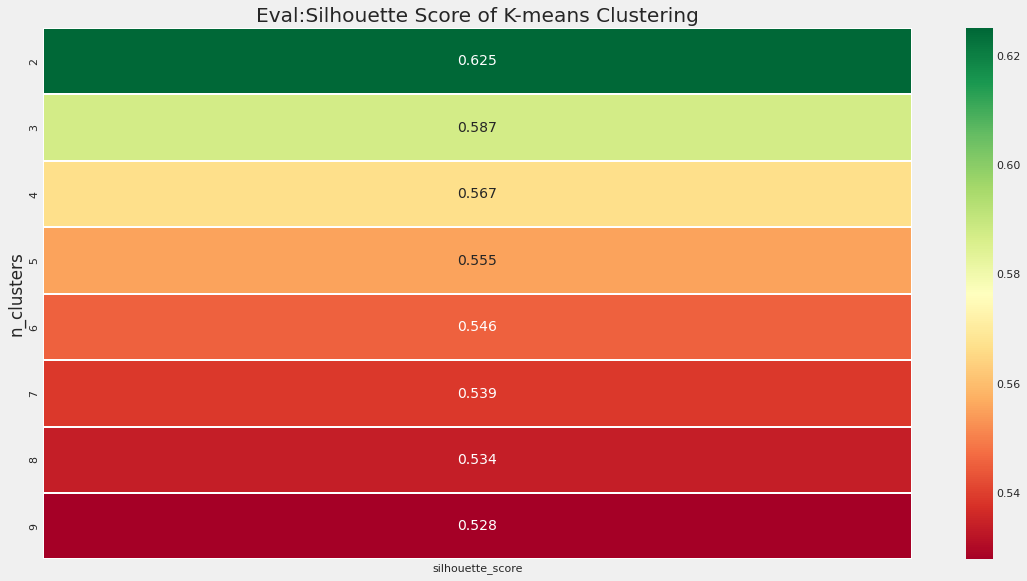

In [32]:
visualize_silhouette_layer(X)

#Customer personality analysis for marketing retargeting

##Cluster Analysis & Interpretation

###Statistical Summary per Cluster

In [33]:
numeric

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntCoke',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Z_CostContact',
 'Z_Revenue',
 'age',
 'join_at_age',
 'total_kids',
 'total_amount_spent']

In [34]:
df[numeric+['cluster']].groupby('cluster')['Income','total_amount_spent'].describe()

Income                                                                 \
         count          mean           std        min         25%         50%   
cluster                                                                         
0        556.0  5.283937e+07  3.390526e+07  4023000.0  34216500.0  52345500.0   
1        556.0  5.334953e+07  2.223418e+07  4861000.0  36084000.0  52974000.0   
2        550.0  5.146503e+07  2.143711e+07  2447000.0  33774500.0  50761000.0   
3        554.0  5.132331e+07  2.071323e+07  1730000.0  36339750.0  50694500.0   

                                 total_amount_spent                 \
                75%          max              count           mean   
cluster                                                              
0        69565500.0  666666000.0              556.0  608232.014388   
1        70557750.0  162397000.0              556.0  636028.776978   
2        68072250.0  157243000.0              550.0  598709.090909   
3        66235500.0  157733000.0              554.0  585162.454874   

                                                                          
                   std      min      25%       50%        75%        max  
cluster                                                                   
0        603333.453392   8000.0  67750.0  402000.0  1055750.0  2257000.0  
1        615008.250936   6000.0  69750.0  425000.0  1091250.0  2486000.0  
2        597317.533478  10000.0  65000.0  363500.0  1045250.0  2209000.0  
3        596149.870381   5000.0  76000.0  345000.0   989500.0  2525000.0

Pembagian cluster dengan spending customer.

-Cluster 0 merupakan customer middle spending.

-Cluster 1 merupakan customer risk of churn.

-Cluster 2 merupakan customer low spending.

-Cluster 3 merupakan customer High spending

In [35]:
map_cluster = {
    0 : 'Low Spender',
    1 : 'Risk of Churn',
    2 : 'Mid Spender',
    3 : 'High Spender'
}

df['cluster_mapped'] = df['cluster'].map(map_cluster)

Text(0.5, 1.0, '#Users per cluster')

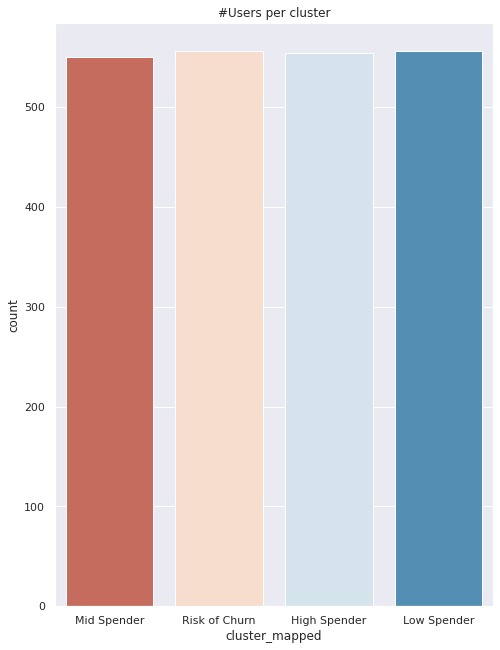

In [36]:
sns.set(rc={'figure.figsize':(7,10)})
sns.countplot(x=df['cluster_mapped'], palette='RdBu')
plt.title('#Users per cluster')

(0.0, 130000000.0)

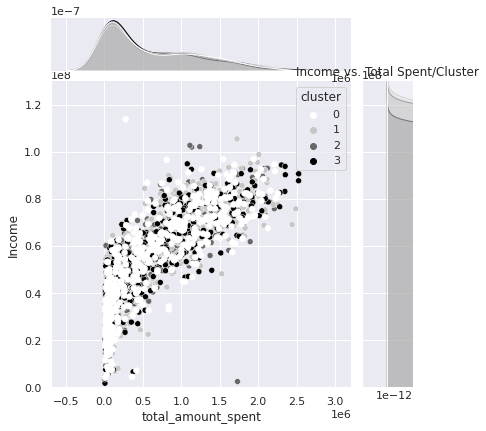

In [37]:
plot = sns.jointplot(x=df["total_amount_spent"], y=df["Income"], hue=df["cluster"],palette='Greys')
plt.title('Income vs. Total Spent/Cluster')
plot.ax_marg_y.set_ylim(0, 130000000)

###Total Income per Cluster

(0.0, 120000000.0)

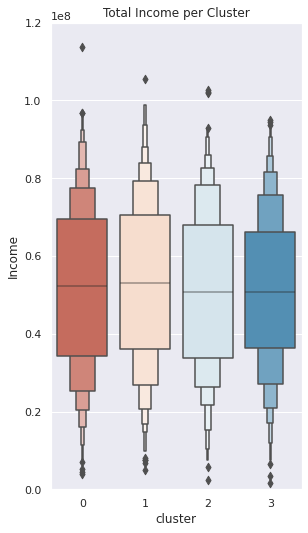

In [88]:
sns.boxenplot(x=df['cluster'], y=df['Income'],palette='RdBu')
plt.title('Total Income per Cluster')
plt.ylim(0, 120000000)

###Total Spending per Cluster

Text(0.5, 1.0, 'Total Amount Spent per Cluster')

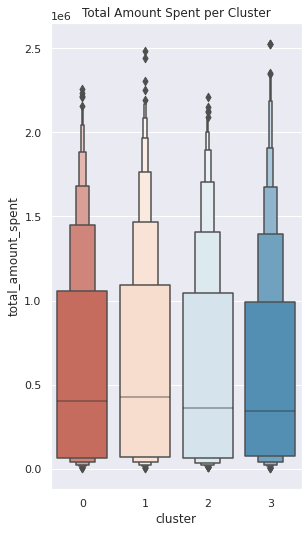

In [91]:
sns.boxenplot(x=df['cluster'], y=df['total_amount_spent'],palette='RdBu')
plt.title('Total Amount Spent per Cluster')

###Total Visits per Cluster

Text(0.5, 1.0, 'Total Visit Web per Cluster')

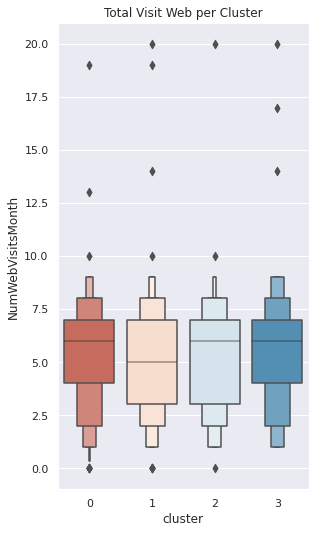

In [93]:
sns.boxenplot(x=df['cluster'], y=df['NumWebVisitsMonth'],palette='RdBu')
plt.title('Total Visit Web per Cluster')

###Deal Puchased per Cluster

Text(0.5, 1.0, 'Deal Puchased per Cluster')

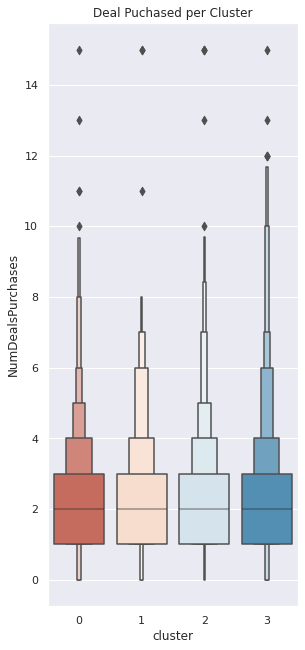

In [99]:
sns.boxenplot(x=df['cluster'], y=df['NumDealsPurchases'],palette='RdBu')
plt.title('Deal Puchased per Cluster')

###Conversion Rate per Cluster

Text(0.5, 1.0, 'Conversion Rate per Cluster')

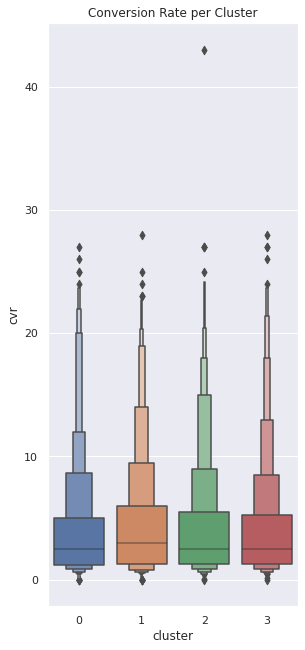

In [105]:
sns.boxenplot(x=df['cluster'], y=df['cvr'])
plt.title('Conversion Rate per Cluster')

##Interpretation

1. Low Spender:
- Kelompok low spender umumnya berisi orang yang berusia >55 tahun (older_adults) dan 36-55 tahun (middle_aged_adults)
- Kelompok ini cukup sering mencari promo dimana biasanya orang-orang kelompok low spender membeli promo 2 kali dalam sebulan
- Kelompok ini merupakan kelompok kedua paling sering mengunjungi website dengan median sebanyak 5 kali dalam sebulan
-Kelompok ini memiliki total pengeluaran sebesar 506k dalam setahun dan pendapatan sebesar 57 juta dalam setahun, dimana nilai tersebut merupakan yang paling kecil kedua dibandingkan kelomopk lain



2. Risk of Churn:
- Kelompok ini memiliki jumlah user sebanyak 900 orang dimana menjadikan kelompok ini menjadi kelompok dengan user terbanyak, dimana umumnya didominasi oleh user dengan umur 36-55 tahun (middle_aged_adults)
- Kelompok ini memiliki pendapatan sebesar 33,4 Juta dalam setahun dan pengeluaran sebesar 57k dalam setahun, menjadikan kelompok ini mempunyai pendapatan dan pengeluaran paling kecil setiap bulannya dibandingkan kelompok lain
- Kelompok ini merupakan kelompok yang paling sering mengunjungi website dengan median total kunjungan sebabnyak 7 kali dalam sebulan, walaupun jarang bertransaksi dan menggunakan promo pada transaksinya
- campaign tidak banyak berpengaruh, karena kelompok ini tidak banyak merespon dari campaign



3. Mid Spender:
- Kelompok ini berisi orang yang berumur >55 tahun (older_adults) dan umur 36-55 tahun (middle_aged_adults)
- Kelompok ini mempunyai total pendapatan sebesar 68 juta dalam setahun dan pengeluaran sebesar 1,1 juta dalam setahun, menjadikan kelompok ini mempunyai total pendapatan dan pengeluaran terbesar kedua dibandingkan Kelompok lainnya
- Kelompok ini jarang membuka website, namun sering merespon campaign dan paling sering menggunakan promo dalam sebulan, terhitung rata-rata penggunaan promo sebanyak 3 kali dalam sebulan.



4. High Spender:
- Kelompok ini memiliki user dengan jumlah terkecil yaitu sebanyak 137 orang, terdiri dari orang berumur >55 tahun (older_adults) dan orang berumur 36-55 tahun (middle_aged_adults)
-kelompok ini memiliki total pendapatan sebesar 80 juta dalam setahun dan pengeluaran sebesar 1,2 juta dalam setahun, menjadikan kelompok ini menjadi kelomopk dengan pendaptan dan pengeluaran terbesar setiap bulannya dibandingkan kelompok lain
- Kelompok ini cukup banyak merespon campaign, namun jumlah pengguna promo paling sedikit dibandingkan kelompok lainnya
- Kelompok ini merupakan yang paling sering membeli produk, dimana terlihat dari nilai conversion rate paling besar dibanding kelompok lain


##Recommendation

1. Monitor Transaksi dari kelompok High Spender dan fokuskan untuk meningkatkan service agar kelompok ini tidak churn

2. Pada kelompok Mid Spender dapat dilakukan analisis lebih lanjut agar meningkatkan transaksi dengan beberapa cara, salah satunya yaitu dengan memberikan rekomendasi yang lebih intim terhadap kelompok tersebut, dan optimalkan promo pada kelompok ini supaya meningkatkan tingkat pembelanjaan dari kelompok ini  


3. Lakukan analisis lebih lanjut terhadap kelompok Low Spender dan Risk to Churn
untuk meningkatkan daya tarik terhadap website kita supaya kelomopk ini mengunjungi website lebih sering dan melakukan transaksi, karena kelompok ini sering mengunjungi website namun tidak melakukan transaksi. mungkin dapat diberikan promo khusus kepada kelompok ini agar meningkatkan daya beli pada produk.
